In [5]:
from IPython.display import display
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [20]:
# DATASET_PATH = '../data/'
# DATASET_FILENAME = DATASET_PATH + 'Merah.zip'

# raw_dataset = pd.read_csv(DATASET_FILENAME)



raw_dataset = pd.read_csv('C:/Users/Gde/Project4_Fish/ml-fish-weight-predition/data/fish/Merah.csv')

# # raw_dataset = pd.read_csv('data/fish/merah.csv')
# raw_dataset = pd.read_csv('merah.csv')




# Load dataset

# Data Cleaning

In [21]:
raw_dataset.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0     Mas   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Mas   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Mas   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Mas   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Mas   430.0     26.5     29.0     34.0  12.4440  5.1340

In [22]:
raw_dataset.shape

(159, 7)

In [23]:
raw_dataset.columns = raw_dataset.columns.str.lower().str.replace(' ','_')

In [24]:
raw_dataset.columns

Index(['species', 'weight', 'length1', 'length2', 'length3', 'height',
       'width'],
      dtype='object')

In [25]:
raw_dataset.isnull().sum()

species    0
weight     0
length1    0
length2    0
length3    0
height     0
width      0
dtype: int64

# EDA
- [x] Check features  
- [x] Select feature types and target
  [x] Categorical: display count values ("histogram"), check mutual_info_score
- [x] Numerical: Numerical: check distributions, correlations, skewness and outliers


In [26]:
# Check features
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  159 non-null    object 
 1   weight   159 non-null    float64
 2   length1  159 non-null    float64
 3   length2  159 non-null    float64
 4   length3  159 non-null    float64
 5   height   159 non-null    float64
 6   width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


This dataset is very usable. There are no nulls/NaNs and the inferred types by read_csv are correct. Categorical feature 'species' and the rest of the features are numerical. Select 'weight' as target for predictions

In [27]:
categorical = list(raw_dataset.dtypes.index[(raw_dataset.dtypes == 'object') | (raw_dataset.dtypes == 'str')])
numerical = list(raw_dataset.dtypes.index[(raw_dataset.dtypes != 'object') & (raw_dataset.dtypes != 'str')])
print('Categorical', categorical)
print('Numerical', numerical)

Categorical ['species']
Numerical ['weight', 'length1', 'length2', 'length3', 'height', 'width']


In [28]:
target = 'weight'
numerical.remove(target)

## Target

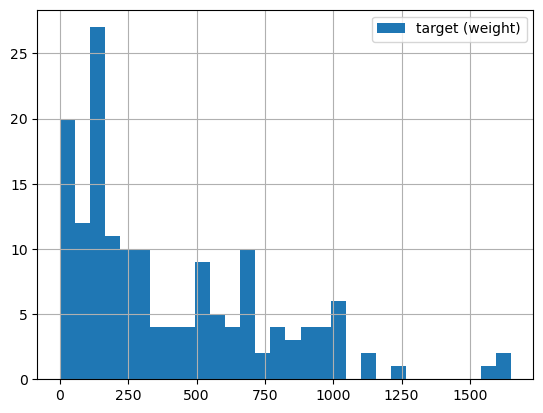

In [29]:
raw_dataset[target].hist(bins=30, label="target (weight)")
plt.legend()

This is not a long tail situation. Could be having outliers, let's check later on.

## Categorical

In [30]:
raw_dataset.describe(include=['object'])

species
count      159
unique       5
top       Nila
freq        92

species  nila  mas  mujahir  gurami  merah
count      92   35       20       6      6

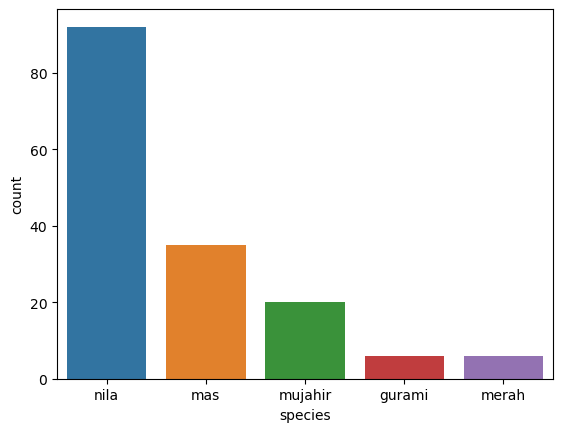

In [31]:
for category in categorical:
  raw_dataset[category] = raw_dataset[category].str.lower()
  value_counts = pd.DataFrame(raw_dataset[category].value_counts())
  display(value_counts.T)
  sns.countplot(x=raw_dataset[category], order=value_counts.index)

In [33]:
categorical

['species']

Correlation between categorical variables and numerical variables (target or any other feature) may be calculated by alternative methods.
https://stats.stackexchange.com/questions/29489/how-do-i-study-the-correlation-between-a-continuous-variable-and-a-categorical
Discretize continuous into numerical categories or just categories. Mutual info score also works with numerical categories.

Let's create a discretized target from the weight target variable. We use qcut, that cuts the variable into n different intervals using quantiles, that is, if q=10, each interval has 10% of the samples. So the actual intervals differ in size (cut is used for intervals of the same size)

In [34]:
q_weight = pd.qcut(raw_dataset[target], q=10)
q_weight.value_counts(sort=False)

weight
(-0.001, 29.58]    16
(29.58, 106.0]     16
(106.0, 142.0]     16
(142.0, 181.6]     16
(181.6, 273.0]     16
(273.0, 390.0]     16
(390.0, 549.6]     15
(549.6, 700.0]     18
(700.0, 930.0]     14
(930.0, 1650.0]    16
Name: count, dtype: int64

In [35]:
from sklearn.metrics import mutual_info_score
mutual_info_score(q_weight, raw_dataset["species"])

0.36176662174747765

There is nothing to compare with. 

## Numerical

In [36]:
raw_dataset.describe().T

count        mean         std     min        25%       50%       75%  \
weight   159.0  398.326415  357.978317  0.0000  120.00000  273.0000  650.0000   
length1  159.0   26.247170    9.996441  7.5000   19.05000   25.2000   32.7000   
length2  159.0   28.415723   10.716328  8.4000   21.00000   27.3000   35.5000   
length3  159.0   31.227044   11.610246  8.8000   23.15000   29.4000   39.6500   
height   159.0    8.970994    4.286208  1.7284    5.94480    7.7860   12.3659   
width    159.0    4.417486    1.685804  1.0476    3.38565    4.2485    5.5845   

              max  
weight   1650.000  
length1    59.000  
length2    63.400  
length3    68.000  
height     18.957  
width       8.142

In [37]:
import sklearn
sc = sklearn.preprocessing.StandardScaler()
a = sc.fit(raw_dataset[numerical])
b = sc.transform(raw_dataset[numerical])
pd.DataFrame(b).describe()

0             1             2             3             4
count  1.590000e+02  1.590000e+02  1.590000e+02  1.590000e+02  1.590000e+02
mean  -1.061345e-16 -1.452367e-16 -7.820439e-17  4.468822e-17 -2.793014e-16
std    1.003160e+00  1.003160e+00  1.003160e+00  1.003160e+00  1.003160e+00
min   -1.881310e+00 -1.873679e+00 -1.937763e+00 -1.695083e+00 -2.005294e+00
25%   -7.222480e-01 -6.941887e-01 -6.978805e-01 -7.082613e-01 -6.140072e-01
50%   -1.050852e-01 -1.044433e-01 -1.578620e-01 -2.773402e-01 -1.005570e-01
75%    6.475523e-01  6.631618e-01  7.277683e-01  7.945562e-01  6.944472e-01
max    3.286801e+00  3.274892e+00  3.177292e+00  2.337161e+00  2.216321e+00

Delete samples with weight = 0

In [38]:
raw_dataset[raw_dataset['weight'] < 1]

species  weight  length1  length2  length3  height   width
40  mujahir     0.0     19.0     20.5     22.8  6.4752  3.3516

In [39]:
raw_dataset.drop(raw_dataset[raw_dataset['weight'] < 1].index, axis=0, inplace=True)

## Histogram of numerical variables

C:\Users\Gde\AppData\Local\Temp\ipykernel_20500\2083701009.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  raw_dataset[numerical].hist(bins=50, ax=ax, layout=(3,3))


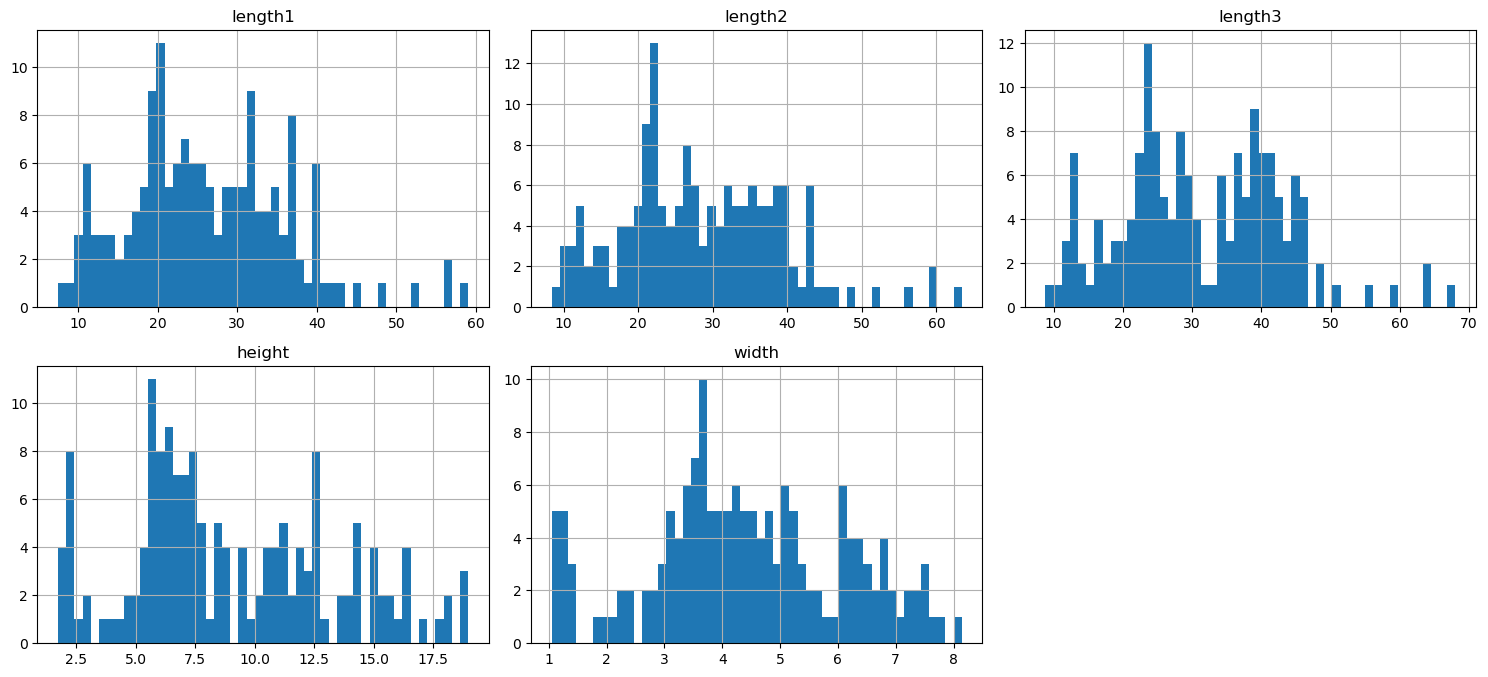

In [40]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
raw_dataset[numerical].hist(bins=50, ax=ax, layout=(3,3))
plt.tight_layout()
plt.show()

Check skew, a numerical formulation of what we see in the histograms.  
When a distribution is asymmetrical the tail of the distribution is skewed to one side-to the right or to the left.  
When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve.  
When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.  
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical  
If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed  
If the skewness is less than -1 or greater than 1, the data are highly skewed  

In [41]:
raw_dataset[numerical].skew()

length1    0.578149
length2    0.529417
length3    0.380822
height     0.387337
width     -0.005539
dtype: float64

## Check outliers

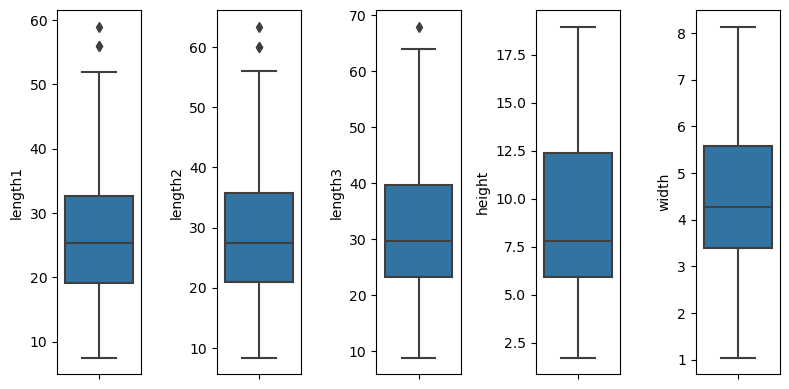

In [42]:
f, axes = plt.subplots(1,5, figsize=(8, 4))

for name, ax in zip(numerical, axes.flatten()):
  sns.boxplot(y=raw_dataset[name], data=raw_dataset, ax = ax)
  
plt.tight_layout()

## Check correlation

<Axes: >

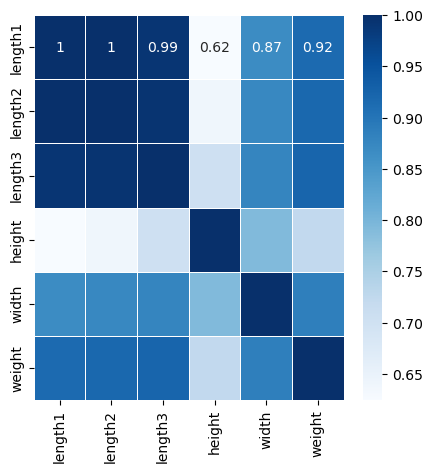

In [44]:
plt.figure(figsize=(5,5))
sns.heatmap(raw_dataset[numerical+[target]].corr(), annot=True, cmap='Blues', linewidths=0.5)

In [45]:
raw_dataset[numerical+[target]].corr()

length1   length2   length3    height     width    weight
length1  1.000000  0.999516  0.992004  0.624409  0.866684  0.915719
length2  0.999516  1.000000  0.994083  0.639503  0.873201  0.918603
length3  0.992004  0.994083  1.000000  0.702655  0.878189  0.923090
height   0.624409  0.639503  0.702655  1.000000  0.792401  0.723857
width    0.866684  0.873201  0.878189  0.792401  1.000000  0.886654
weight   0.915719  0.918603  0.923090  0.723857  0.886654  1.000000

lenghts 1 to 3 are extremely correlated. And any of the numerical features is correlated with weight (target). It is reasonable, since the larger the fish dimensions, the bigger the weight. We could check this on a fish (category) basis, calculate the correlation for each category of fishes

c:\Users\Gde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Gde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Gde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Gde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

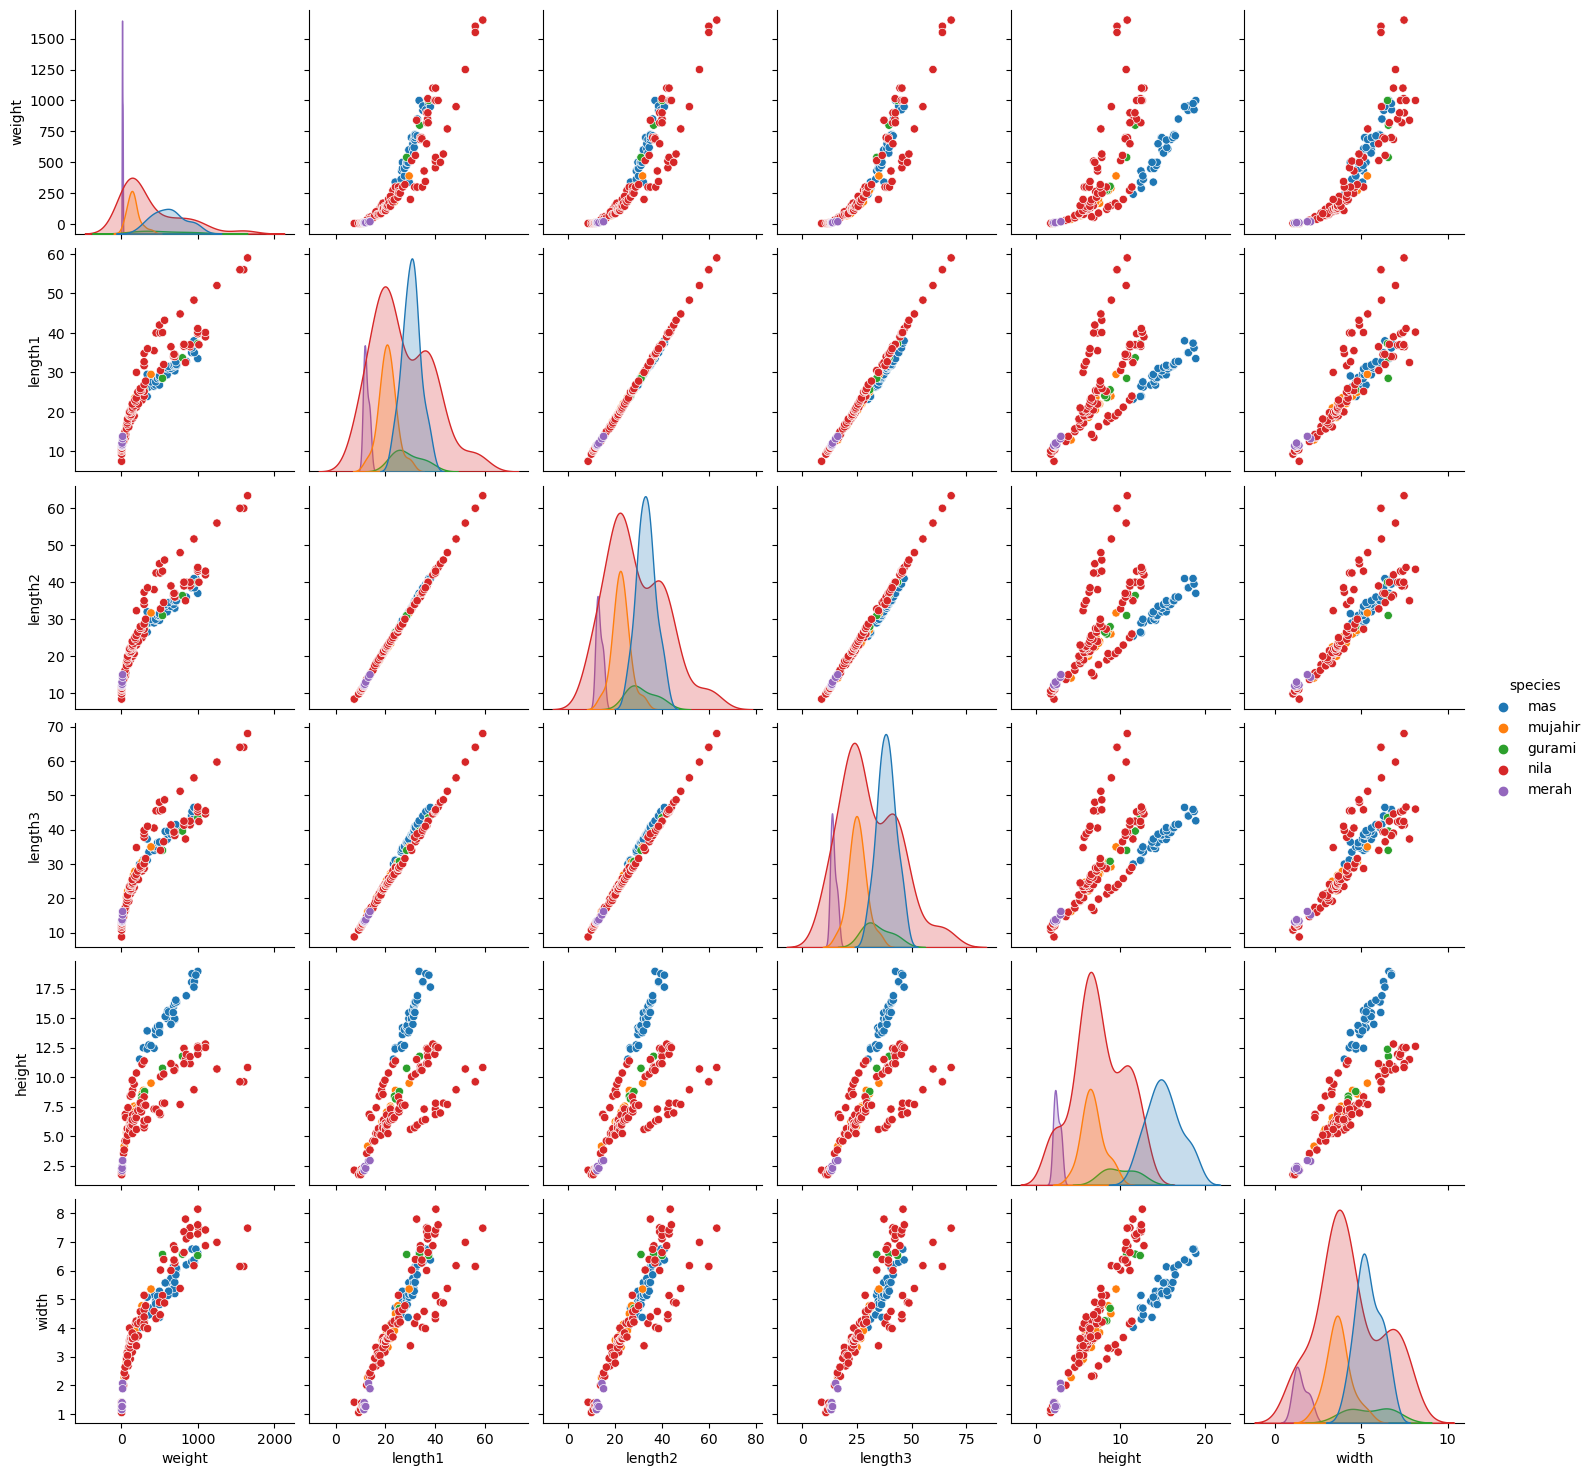

In [46]:
g = sns.pairplot(raw_dataset, kind='scatter', hue='species')

Correlation of lengths persists in all species.
The distribution is different for each specie, however these are gaussian-like except for the perch (standardization should manage this). No no long tails.

Initially, we will keep all the features

# PCA

We can do a PCA analysis to check the possibility of transforming the features on a different space of non-correlated variables, also with low dimension

In [47]:
numerical

['length1', 'length2', 'length3', 'height', 'width']

In [48]:
from sklearn.decomposition import PCA
pca = PCA(5)
pca.fit(raw_dataset[numerical])
pca.explained_variance_

array([3.59940100e+02, 1.11316967e+01, 6.76836252e-01, 1.22137315e-01,
       3.00570109e-02])

Let's keep this for now... we will get back to PCA in the case of we do not find a good performance with real features

# Select strategy

1. Start with LinearRegressor
   1. Use stratify to keep species distribution in train and val/test sets
   2. Start without managing outliers, and use all three correlated dimensions.
   3. Manage outliers
   4. Check with only one of the correlated dimensions.  
   5. Check val with cross-validation since the dataset is small.
2. Continue with Lasso and Ridge
   1. Select best alpha with cross-validation
3. Continue with decision Tree
   1. Use cross validation together with several values of max_depth and min_sample_leaf
4. Continue with Random Forest
   1. Use cross validation with several values of max_depth, min_sample_leaf and num_estimators
5. Conclude with XGBoost
   1. Use cross validation with several values of the most important parameters
6. Select the best model. Retrain with the fulltrain dataset. Test with test dataset

# Select evaluation metrics

rmse will be used for this correlation problem

In [49]:
from sklearn.metrics import mean_squared_error

# Create train-val-test datasets

In [50]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split


In [51]:
def split (raw_dataset, to_stratify, target):
  dataset = raw_dataset.copy() 
  df_full_train, df_test = train_test_split(dataset, test_size=0.2, random_state=5, stratify=dataset[to_stratify])
  df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=5, stratify=df_full_train[to_stratify])
  y_full_train = df_full_train[target].values
  y_train = df_train[target].values
  y_val = df_val[target].values
  y_test = df_test[target].values
  del df_full_train[target]
  del df_train[target]
  del df_val[target]
  del df_test[target]
  return df_train, df_val, df_test, df_full_train, y_train, y_val, y_test, y_full_train

In [52]:
df_train, df_val, df_test, df_full_train, \
  y_train, y_val, y_test, y_full_train = split(raw_dataset, to_stratify=categorical, target=target)

# Prepare Features
Define pipeline

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_extraction import DictVectorizer

In [54]:
class ToDictTransformer(TransformerMixin, BaseEstimator):

  def __init__(self):
    self.columns = None

  def fit(self, df, y=None):
    return self

  def transform(self, df):
    return df.to_dict(orient='records')

  def get_feature_names_out(self, *args, **kwargs):
    return self.columns

In [55]:
categorical_pipeline = make_pipeline(ToDictTransformer(), DictVectorizer())

In [57]:
preprocessor = ColumnTransformer([
  ('categorical', categorical_pipeline, categorical),
  ('numerical', StandardScaler(), numerical)
])

# Train Linear Regressions

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
train_pipeline = make_pipeline(preprocessor, LinearRegression(fit_intercept=True))

In [60]:
train_pipeline.fit(df_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('todicttransformer',
                                                                   ToDictTransformer()),
                                                                  ('dictvectorizer',
                                                                   DictVectorizer())]),
                                                  ['species']),
                                                 ('numerical', StandardScaler(),
                                                  ['length1', 'length2',
                                                   'length3', 'height',
                                                   'width'])])),
                ('linearregression', LinearRegression())])

Check prediction on train dataset

Visualize results

In [61]:
def evaluate(model, df_train, df_val, df_test):

  y_pred_train = model.predict(df_train)
  y_pred_val = model.predict(df_val)
  y_pred_test = model.predict(df_test)

  rmse_train = mean_squared_error(y_pred_train, y_train, squared=False)
  rmse_val = mean_squared_error(y_pred_val, y_val, squared=False)
  rmse_test = mean_squared_error(y_pred_test, y_test, squared=False)

  results_train = pd.DataFrame({ 
    'y_pred_train': y_pred_train,
    'y_train': y_train,
    'error_train': y_pred_train-y_train,
    'error_train(%)': 100 * (y_pred_train-y_train) / y_train
  })
  results_val = pd.DataFrame({ 
    'y_pred_val': y_pred_val,
    'y_val': y_val,
    'error_val': y_pred_val-y_val,
    'error_val(%)': 100 * (y_pred_val-y_val) / y_val
  })
  results_test = pd.DataFrame({ 
    'y_pred_val': y_pred_test,
    'y_test': y_test,
    'error_test': y_pred_test-y_test,
    'error_test(%)': 100 * (y_pred_test-y_test) / y_test
  })
  return y_pred_train, y_pred_val, y_pred_test, rmse_train, rmse_val, rmse_test, results_train, results_val, results_test

<Axes: xlabel='y_val', ylabel='error_val(%)'>

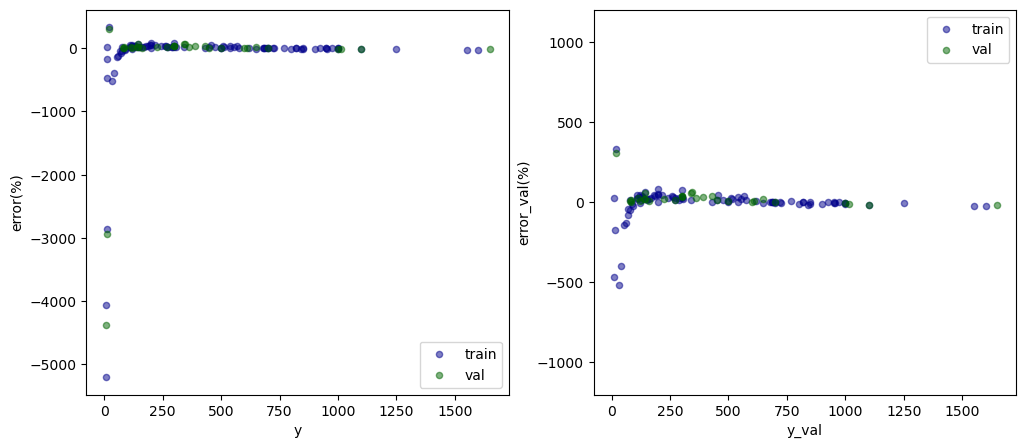

In [62]:
y_pred_train, y_pred_val, y_pred_test, \
  rmse_train, rmse_val, rmse_test, \
  results_train, results_val, results_test = evaluate(train_pipeline, df_train, df_val, df_test)
fig, axes = plt.subplots(1,2, figsize=(12,5))
results_train.plot(y='error_train(%)', x='y_train', kind='scatter', color='DarkBlue', label='train', alpha=0.5, ax=axes[0])
results_val.plot(y='error_val(%)', x='y_val', kind='scatter', color='DarkGreen', label='val', alpha=0.5, ax=axes[0])
axes[0].set(xlabel='y', ylabel='error(%)')
axes[1].set(xlabel='y', ylabel='error(%)')
plt.ylabel('error(%)')
plt.ylim(-1200, 1200)
results_train.plot(y='error_train(%)', x='y_train', kind='scatter', color='DarkBlue', label='train', alpha=0.5, ax=axes[1])
results_val.plot(y='error_val(%)', x='y_val', kind='scatter', color='DarkGreen', label='val', alpha=0.5, ax=axes[1])

In [63]:
# Outlier?
results_train.iloc[y_train.argmin()]

y_pred_train      -300.853653
y_train              5.900000
error_train       -306.753653
error_train(%)   -5199.214465
Name: 47, dtype: float64

Relative error (to the actual weight) is higher at low weights in both train and val datasets. High bias and variance on this segment

In [64]:
results = pd.DataFrame({'train_lin_reg': [rmse_train], 'val_lin_reg': [rmse_val], 'test_lin_reg': [rmse_test]}, index=['rmse'])
results.T


rmse
train_lin_reg  111.064579
val_lin_reg    130.125013
test_lin_reg   134.572132

Analyse the effect of stratify and random state:

Running several times the train with stratify and different random state cause that sometimes, the val rmse is lower than the train rmse. This means that by chance, the validation dataset is fitted better then the trainning dataset. This seems that it not happening when stratify is not used.
The reason is that the dataset is pretty small. Note that not using stratify may lead to a val dataset that may have a missed class

**Manage outliers**

Firslty, let's try with a Robust Scaler, that could improve the effect of the outliers

In [65]:
preprocessor = ColumnTransformer([
  ('categorical', categorical_pipeline, categorical),
  ('numerical', make_pipeline(RobustScaler(), StandardScaler()), numerical)
])
train_pipeline = make_pipeline(preprocessor, LinearRegression(fit_intercept=True))
train_pipeline.fit(df_train, y_train)
y_pred_train, y_pred_val, y_pred_test, \
  rmse_train, rmse_val, rmse_test, \
  results_train, results_val, results_test = evaluate(train_pipeline, df_train, df_val, df_test)
print(f'rmse_train_robust={rmse_train:.09f}, rmse_val_robust={rmse_val:0.9f}')

rmse_train_robust=111.064578502, rmse_val_robust=130.125013498


There is no improvement...

Remove outliers (according to box plot) and compare results

In [66]:
def remove_outliers(df, columns):
  df = df.copy()
  for column in columns:
    serie = df[column]
    q1 =  serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    lower_value = q1 - 1.5 * iqr
    higher_value = q3 + 1.5 * iqr
    to_remove = df[(serie < lower_value) | (serie > higher_value)].index
    if len(to_remove) > 0:
      print('Removing outliers')
      print(to_remove)
    df.drop(to_remove, inplace=True)
  return df

In [67]:
dataset_no_outliers = remove_outliers(raw_dataset, numerical)

Removing outliers
Index([142, 143, 144], dtype='int64')


In [68]:
df_train.shape

(94, 6)

In [69]:
df_train, df_val, df_test, df_full_train, \
  y_train, y_val, y_test, y_full_train = split(dataset_no_outliers, to_stratify=categorical, target=target)

train_pipeline.fit(df_train, y_train)

y_pred_train, y_pred_val, y_pred_test, \
  rmse_train, rmse_val, rmse_test, \
  results_train, results_val, results_test = evaluate(train_pipeline, df_train, df_val, df_test)
  
print(f'rmse_train_no_outliers={rmse_train:.02f}, rmse_val_no_outliers={rmse_val:0.2f}')
results['train_lin_reg_no_outliers'] = [rmse_train]
results['val_lin_reg_no_outliers'] = [rmse_val]
results['test_lin_reg_no_outliers'] = [rmse_test]
results.T


rmse_train_no_outliers=88.05, rmse_val_no_outliers=98.87


rmse
train_lin_reg              111.064579
val_lin_reg                130.125013
test_lin_reg               134.572132
train_lin_reg_no_outliers   88.052929
val_lin_reg_no_outliers     98.874640
test_lin_reg_no_outliers   113.261309

Important improvement in fitting trainning data and validation data when the outliers are discarded. This is true when previously, any of train or val datasets had utliers. This depends on the random_state used.

Eliminate colinear features. Discard length2 and length3. length3 is the one with highest coef correlation with the target, however, the results are similar and with lenght1 are slightly better.  
Note that the ColumnTransformer will drop (remainder='drop' by default) any column not included in the list

In [70]:
simplified_numerical = [e for e in numerical if e not in ['length2', 'length3']]

preprocessor = ColumnTransformer([
  ('categorical', categorical_pipeline, categorical),
  ('numerical', StandardScaler(), simplified_numerical)
], remainder='drop')
train_pipeline = make_pipeline(preprocessor, LinearRegression(fit_intercept=True))
train_pipeline.fit(df_train, y_train)

y_pred_train, y_pred_val, y_pred_test, \
  rmse_train, rmse_val, rmse_test, \
  results_train, results_val, results_test = evaluate(train_pipeline, df_train, df_val, df_test)

print(f'rmse_train_no_outliers_simple={rmse_train:.02f}, rmse_val_no_outliers_simple={rmse_val:0.2f}')
results['train_lin_reg_no_outliers_simple'] = [rmse_train]
results['val_lin_reg_no_outliers_simple'] = [rmse_val]
results['test_lin_reg_no_outliers_simple'] = [rmse_test]
results.T

rmse_train_no_outliers_simple=90.65, rmse_val_no_outliers_simple=95.70


rmse
train_lin_reg                     111.064579
val_lin_reg                       130.125013
test_lin_reg                      134.572132
train_lin_reg_no_outliers          88.052929
val_lin_reg_no_outliers            98.874640
test_lin_reg_no_outliers          113.261309
train_lin_reg_no_outliers_simple   90.646551
val_lin_reg_no_outliers_simple     95.698219
test_lin_reg_no_outliers_simple   114.740105

This simple model has a similar performance

**Let's continue with: stratify - no outliers - simple.**  
Note that decision trees are not affected (in general) by colinearity and tree based algorithms do not require normalization/standarization

Use cross validation to check the distribution of the performance in the validation data. Also because of the limited size of the dataset.

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
train_pipeline = make_pipeline(preprocessor, LinearRegression(fit_intercept=True))

In [73]:
# Keep cv=5 equals 20% for validation. ~25 samples for validation.
# Trainning samples are already shuffled.
# neg_root_mean_squared_error is just the negative of mean_squared_error. So the larger the better.
scores = cross_val_score(train_pipeline, df_full_train, y_full_train, cv=5, scoring='neg_root_mean_squared_error')
print(scores)
cross_val_lin_reg = np.abs(scores.mean())
print(f'mean(-rmse)={cross_val_lin_reg} std(-rmse)={scores.std()}')
results["cross_val_lin_reg"] = cross_val_lin_reg
results.T

[ -71.43357008  -96.92943112  -92.79579332 -114.15960211 -122.31329735]
mean(-rmse)=99.52633879494795 std(-rmse)=17.746130291029946


rmse
train_lin_reg                     111.064579
val_lin_reg                       130.125013
test_lin_reg                      134.572132
train_lin_reg_no_outliers          88.052929
val_lin_reg_no_outliers            98.874640
test_lin_reg_no_outliers          113.261309
train_lin_reg_no_outliers_simple   90.646551
val_lin_reg_no_outliers_simple     95.698219
test_lin_reg_no_outliers_simple   114.740105
cross_val_lin_reg                  99.526339

Test with Lasso and Ridge estimators  
Lasso Linear Model trained with L1 prior as regularizer (aka the Lasso): Cost function (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1 -> hyperparameter alpha  
Rige: ||y - Xw||^2_2 + alpha * ||w||^2_2 -> hyperparameter alpha  

In [74]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [75]:
alphas = [5, 4, 3, 2, 1, 0.5, 0.3, 0.1, 0.05, 0.03, 0.01, 0.001, 0.0005]
scores_lasso = []
scores_ridge = []
for alpha in alphas:
  train_pipeline = make_pipeline(preprocessor, Lasso(fit_intercept=True, alpha=alpha, max_iter=100000))
  scores = cross_val_score(train_pipeline, df_full_train, y_full_train, cv=5, scoring='neg_root_mean_squared_error')
  scores_lasso.append((alpha,scores.mean()))
  print(f'Lasso alpha={alpha} mean(-rmse)={scores.mean()} std(-rmse)={scores.std()}')
  train_pipeline = make_pipeline(preprocessor, Ridge(fit_intercept=True, alpha=alpha, max_iter=100000))
  scores = cross_val_score(train_pipeline, df_full_train, y_full_train, cv=5, scoring='neg_root_mean_squared_error')
  scores_ridge.append((alpha, scores.mean()))
  print(f'Ridge alpha={alpha} mean(-rmse)={scores.mean()} std(-rmse)={scores.std()}')


Lasso alpha=5 mean(-rmse)=-106.09037752966636 std(-rmse)=12.718153953725622
Ridge alpha=5 mean(-rmse)=-101.82767199913272 std(-rmse)=13.082960322512086
Lasso alpha=4 mean(-rmse)=-104.0741339071132 std(-rmse)=13.393259349583936
Ridge alpha=4 mean(-rmse)=-101.28444808129282 std(-rmse)=13.365332062450513
Lasso alpha=3 mean(-rmse)=-101.92869699783475 std(-rmse)=14.05692929387519
Ridge alpha=3 mean(-rmse)=-100.6468611969988 std(-rmse)=13.757538802032988
Lasso alpha=2 mean(-rmse)=-100.24021493174584 std(-rmse)=14.871508196917857
Ridge alpha=2 mean(-rmse)=-99.9161357043854 std(-rmse)=14.335722347328673
Lasso alpha=1 mean(-rmse)=-99.4169527698558 std(-rmse)=15.854948417150295
Ridge alpha=1 mean(-rmse)=-99.2193328381748 std(-rmse)=15.312209196985036
Lasso alpha=0.5 mean(-rmse)=-99.30992723648323 std(-rmse)=16.67503462481199
Ridge alpha=0.5 mean(-rmse)=-99.08506684857149 std(-rmse)=16.16860395132733
Lasso alpha=0.3 mean(-rmse)=-99.34643843362107 std(-rmse)=17.095587268497017
Ridge alpha=0.3 mean

In [76]:
results_lasso = pd.DataFrame(scores_lasso, columns=['alpha','nrmse']).sort_values('nrmse', ascending=False)
best_lasso = results_lasso.iloc[0]
results["cross_val_best_lasso"] = np.abs(best_lasso.nrmse)
print(f'Best lasso ridge = {best_lasso.alpha}')
results.T

Best lasso ridge = 0.5


rmse
train_lin_reg                     111.064579
val_lin_reg                       130.125013
test_lin_reg                      134.572132
train_lin_reg_no_outliers          88.052929
val_lin_reg_no_outliers            98.874640
test_lin_reg_no_outliers          113.261309
train_lin_reg_no_outliers_simple   90.646551
val_lin_reg_no_outliers_simple     95.698219
test_lin_reg_no_outliers_simple   114.740105
cross_val_lin_reg                  99.526339
cross_val_best_lasso               99.309927

In [77]:
results_ridge = pd.DataFrame(scores_ridge, columns=['alpha','nrmse']).sort_values('nrmse', ascending=False)
best_ridge = results_ridge.iloc[0]
results["cross_val_best_ridge"] = np.abs(best_ridge.nrmse)
print(f'Best alpha ridge = {best_ridge.alpha}')
results.T

Best alpha ridge = 0.5


rmse
train_lin_reg                     111.064579
val_lin_reg                       130.125013
test_lin_reg                      134.572132
train_lin_reg_no_outliers          88.052929
val_lin_reg_no_outliers            98.874640
test_lin_reg_no_outliers          113.261309
train_lin_reg_no_outliers_simple   90.646551
val_lin_reg_no_outliers_simple     95.698219
test_lin_reg_no_outliers_simple   114.740105
cross_val_lin_reg                  99.526339
cross_val_best_lasso               99.309927
cross_val_best_ridge               99.085067

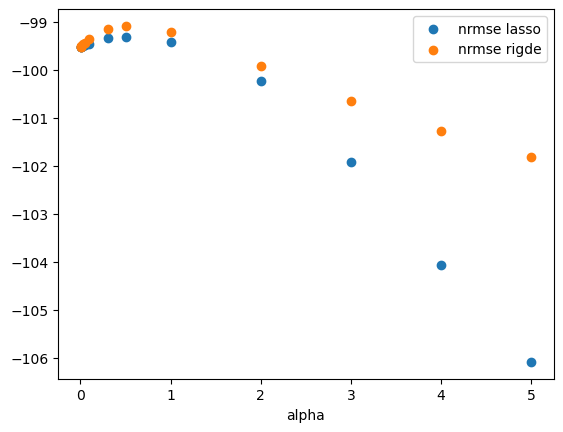

In [78]:
plt.scatter(results_lasso["alpha"], results_lasso["nrmse"], label='nrmse lasso')
plt.scatter(results_ridge["alpha"], results_ridge["nrmse"], label='nrmse rigde')
plt.xlabel('alpha')
plt.legend()

Large alpha will make coefficients smaller (not the interceptor). This means more bias and less variance. Until a point where too much regularization will cause the bias to increase, since the coefficients will become pretty small, which means a less complex model unnable to any of the trainning dataset or validation dataset.
Introduction to Statistical Learning:  
"As λ increases, the flexibility of the ridge regression fit decreases, leading to decreased variance but increased bias."  

In [79]:
# LassoCV will perform for each alpha, a crossvalidation (by default 5 folds)
# LassoCV will be refitted on the full training dataset after finding the best combination of hyper-parameters.
# R2 score is used. To use an alternative, use GridSearchCV with the corresponding estimator and score.
train_pipeline = make_pipeline(preprocessor, LassoCV(fit_intercept=True, alphas=alphas, max_iter=100000))
train_pipeline.fit(df_full_train, y_full_train)
print(f'LassoCV alpha: { train_pipeline.named_steps["lassocv"].alpha_ }')
y_pred = train_pipeline.predict(df_test)
test_best_lasso = mean_squared_error(y_pred, y_test, squared=False)
results['test_best_lasso'] = test_best_lasso

train_pipeline = make_pipeline(preprocessor, RidgeCV(fit_intercept=True, alphas=alphas))
train_pipeline.fit(df_full_train, y_full_train)
print(f'RidgeCV alpha: { train_pipeline.named_steps["ridgecv"].alpha_ }')
y_pred = train_pipeline.predict(df_test)
test_best_ridge = mean_squared_error(y_pred, y_test, squared=False)
results['test_best_ridge'] = test_best_ridge

results.T

LassoCV alpha: 1.0
RidgeCV alpha: 0.5


rmse
train_lin_reg                     111.064579
val_lin_reg                       130.125013
test_lin_reg                      134.572132
train_lin_reg_no_outliers          88.052929
val_lin_reg_no_outliers            98.874640
test_lin_reg_no_outliers          113.261309
train_lin_reg_no_outliers_simple   90.646551
val_lin_reg_no_outliers_simple     95.698219
test_lin_reg_no_outliers_simple   114.740105
cross_val_lin_reg                  99.526339
cross_val_best_lasso               99.309927
cross_val_best_ridge               99.085067
test_best_lasso                   113.596646
test_best_ridge                   114.829969

Conclusion:  
Small values of the target have more relative error.  
The small size of the dataset may lead to a validation rmse lower than the trainning rmse. Specially when using stratifty in the train_test_split to keep the distribution of the 'species' class across train and validation datasets. Cross-validation is used to mitigate this effect.  
The small size of the dataset causes that the rmse may vary depending on how the data is shuffled (train_test_split and k-fold subset), as shown in the cross validation (std deviation).  
There is no important improvement in using Lasso or Ridge over standard linear regression.  
Dataset stratified, without outliers and without length2 and length3 features is used.  
Lasso with alpha=0.3 is the best choice.  

# Train decision Tree Regressor

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=5)
train_pipeline = make_pipeline(preprocessor, tree)
train_pipeline.fit(df_train, y_train)
y_pred_train = train_pipeline.predict(df_train)
y_pred_val = train_pipeline.predict(df_val)
rmse_train = mean_squared_error(y_pred_train, y_train, squared=False)
rmse_val = mean_squared_error(y_pred_val, y_val, squared=False)
print(f'rmse_train_no_outliers_simple={rmse_train:.02f}, rmse_val_no_outliers_simple={rmse_val:0.2f}')

rmse_train_no_outliers_simple=0.00, rmse_val_no_outliers_simple=71.42


Obviously, overfit by default, since (at least) max_depth and min_sample_leafs are not set. Let's use GridSearchCV to find the best values for these two params
GridSearchCV will, by default, refit on the full train dataset, with the best params.

In [83]:
train_pipeline = make_pipeline(preprocessor, tree)
train_pipeline.named_steps

{'columntransformer': ColumnTransformer(transformers=[('categorical',
                                  Pipeline(steps=[('todicttransformer',
                                                   ToDictTransformer()),
                                                  ('dictvectorizer',
                                                   DictVectorizer())]),
                                  ['species']),
                                 ('numerical', StandardScaler(),
                                  ['length1', 'height', 'width'])]),
 'decisiontreeregressor': DecisionTreeRegressor(random_state=5)}

In [84]:
train_pipeline = make_pipeline(preprocessor, tree)
dc_params = [{
  'decisiontreeregressor__max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'decisiontreeregressor__min_samples_leaf' : [1, 5, 10, 20, 30]
}]
gs_decision_tree = GridSearchCV(train_pipeline, param_grid=dc_params, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=4)
gs_decision_tree.fit(df_full_train, y_full_train)
gs_decision_tree.best_params_

{'decisiontreeregressor__max_depth': 9,
 'decisiontreeregressor__min_samples_leaf': 1}

In [85]:
gs_decision_tree.cv_results_["mean_test_score"].mean()

-121.95293180141248

In [86]:
gs_decision_tree.cv_results_["mean_train_score"].mean()

-94.1374404958779

In [87]:
test_decision_tree = np.abs(gs_decision_tree.score(df_test, y_test))
results["test_decision_tree"] = test_decision_tree
results.T

rmse
train_lin_reg                     111.064579
val_lin_reg                       130.125013
test_lin_reg                      134.572132
train_lin_reg_no_outliers          88.052929
val_lin_reg_no_outliers            98.874640
test_lin_reg_no_outliers          113.261309
train_lin_reg_no_outliers_simple   90.646551
val_lin_reg_no_outliers_simple     95.698219
test_lin_reg_no_outliers_simple   114.740105
cross_val_lin_reg                  99.526339
cross_val_best_lasso               99.309927
cross_val_best_ridge               99.085067
test_best_lasso                   113.596646
test_best_ridge                   114.829969
test_decision_tree                 41.193475

In [88]:
y_pred_full_train = gs_decision_tree.predict(df_full_train)
print(mean_squared_error(y_pred_full_train, y_full_train, squared=False))

1.0366275966775862


Auto-refit on the full_train set causes overfit.

Slight improvement with the decision Tree on test set. 

# Train Random Forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor

Most important params are:

n_estimators: int, default=100 The number of trees in the forest.

max_features: {“sqrt”, “log2”, None}, int or float, default=”sqrt”. The number of features to consider when looking for the best split

bootstrap: bool, default=True. Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

oob_score: bool, default=False. Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.

max_samples: int or float, default=Non. If bootstrap is True, the number of samples to draw (se extraerán) from X to train each base estimator. If None (default), then draw X.shape[0] samples. 


In [90]:
random_forest_ = RandomForestRegressor(random_state=5)
train_pipeline = make_pipeline(preprocessor, random_forest_)
train_pipeline.named_steps

{'columntransformer': ColumnTransformer(transformers=[('categorical',
                                  Pipeline(steps=[('todicttransformer',
                                                   ToDictTransformer()),
                                                  ('dictvectorizer',
                                                   DictVectorizer())]),
                                  ['species']),
                                 ('numerical', StandardScaler(),
                                  ['length1', 'height', 'width'])]),
 'randomforestregressor': RandomForestRegressor(random_state=5)}

In [91]:
rf_params = [{
  'randomforestregressor__max_depth' : [ 4, 5, 6, 7, 8, 9, 10],
  'randomforestregressor__min_samples_leaf' : [1, 5],
  'randomforestregressor__n_estimators': [80, 90, 100, 110, 120]
}]

In [92]:
gs_random_forest = GridSearchCV(estimator=train_pipeline, param_grid=rf_params, cv=5, scoring="neg_root_mean_squared_error", verbose=True, n_jobs=4)
gs_random_forest.fit(df_full_train, y_full_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('todicttransformer',
                                                                                          ToDictTransformer()),
                                                                                         ('dictvectorizer',
                                                                                          DictVectorizer())]),
                                                                         ['species']),
                                                                        ('numerical',
                                                                         StandardScaler(),
                                                                         ['length1',
                                                                          'height',
                                                                          'width'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=5))]),
             n_jobs=4,
             param_grid=[{'randomforestregressor__max_depth': [4, 5, 6, 7, 8, 9,
                                                               10],
                          'randomforestregressor__min_samples_leaf': [1, 5],
                          'randomforestregressor__n_estimators': [80, 90, 100,
                                                                  110, 120]}],
             scoring='neg_root_mean_squared_error', verbose=True)

In [176]:
test_best_random_forest = gs_random_forest.score(df_test, y_test)
print(f'test_best_random_forest = {test_best_random_forest}')
print(gs_random_forest.best_params_)
results["test_best_random_forest"] = np.abs(test_best_random_forest)
results.T

test_best_random_forest = -63.82449498376153
{'randomforestregressor__max_depth': 6, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__n_estimators': 80}


rmse
train_lin_reg                      87.660631
val_lin_reg                        96.110338
test_lin_reg                      109.268457
train_lin_reg_no_outliers          73.133018
val_lin_reg_no_outliers            82.580547
test_lin_reg_no_outliers           83.611109
train_lin_reg_no_outliers_simple   75.697855
val_lin_reg_no_outliers_simple     77.542774
test_lin_reg_no_outliers_simple    78.452652
cross_val_lin_reg                  77.548635
cross_val_best_lasso               76.382318
cross_val_best_ridge               76.499108
test_best_lasso                    76.999035
test_best_ridge                    77.338507
test_decision_tree                 83.327227
test_best_random_forest            63.824495

Important improvement with the RandomForestRegressor, as it would be advisable

# Train XGBoost Regressor

In [177]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [178]:
xgb_params = [{
  'xgbregressor__n_estimators': [5,10,50,80,100,120],
  'xgbregressor__max_depth': [2,3,4,5,6],
  'xgbregressor__eta' : [1,0.5,0.3,0.1, 0.01,0.001],
  'xgbregressor__min_child_weight' : [1,5,10],
}]

In [179]:
xgb_regressor = XGBRegressor(random_state=5, n_jobs=4)
train_pipeline = make_pipeline(preprocessor, xgb_regressor)
gs_xgboost = GridSearchCV(estimator=train_pipeline, param_grid=xgb_params, scoring="neg_root_mean_squared_error", verbose=True)

In [180]:
gs_xgboost.fit(df_full_train, y_full_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('todicttransformer',
                                                                                          ToDictTransformer()),
                                                                                         ('dictvectorizer',
                                                                                          DictVectorizer())]),
                                                                         ['species']),
                                                                        ('numerical',
                                                                         StandardScaler(),
                                                                         ['length1',
                                                                          'height',
                                                                          'width'])])),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=Non...
                                                     monotone_constraints=None,
                                                     n_estimators=100, n_jobs=4,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=5, ...))]),
             param_grid=[{'xgbregressor__eta': [1, 0.5, 0.3, 0.1, 0.01, 0.001],
                          'xgbregressor__max_depth': [2, 3, 4, 5, 6],
                          'xgbregressor__min_child_weight': [1, 5, 10],
                          'xgbregressor__n_estimators': [5, 10, 50, 80, 100,
                                                         120]}],
             scoring='neg_root_mean_squared_error', verbose=True)

In [181]:
gs_xgboost.best_params_

{'xgbregressor__eta': 0.1,
 'xgbregressor__max_depth': 5,
 'xgbregressor__min_child_weight': 1,
 'xgbregressor__n_estimators': 80}

In [182]:
test_best_xgboost = gs_xgboost.score(df_test, y_test)
print(f'test_best_xgboost = {test_best_xgboost}')
print(gs_xgboost.best_params_)
results["test_best_xgboost"] = np.abs(test_best_xgboost)
results.T

test_best_xgboost = -63.66325071248218
{'xgbregressor__eta': 0.1, 'xgbregressor__max_depth': 5, 'xgbregressor__min_child_weight': 1, 'xgbregressor__n_estimators': 80}


rmse
train_lin_reg                      87.660631
val_lin_reg                        96.110338
test_lin_reg                      109.268457
train_lin_reg_no_outliers          73.133018
val_lin_reg_no_outliers            82.580547
test_lin_reg_no_outliers           83.611109
train_lin_reg_no_outliers_simple   75.697855
val_lin_reg_no_outliers_simple     77.542774
test_lin_reg_no_outliers_simple    78.452652
cross_val_lin_reg                  77.548635
cross_val_best_lasso               76.382318
cross_val_best_ridge               76.499108
test_best_lasso                    76.999035
test_best_ridge                    77.338507
test_decision_tree                 83.327227
test_best_random_forest            63.824495
test_best_xgboost                  63.663251

Check mse with train, val and test datasets. Note that we have refitted with the full train dataset

In [183]:
y_pred_train, y_pred_val, y_pred_test, \
  rmse_train, rmse_val, rmse_test, \
  results_train, results_val, results_test = evaluate(gs_xgboost, df_train, df_val, df_test)

In [184]:
print(mean_squared_error(y_pred_train, y_train, squared=False))
print(mean_squared_error(y_pred_val, y_val, squared=False))
print(mean_squared_error(y_pred_test, y_test, squared=False))
y_pred_full_train = gs_xgboost.predict(df_full_train)
print(mean_squared_error(y_pred_full_train, y_full_train, squared=False))

8.340629564611858
8.732286903053408
63.66325071248218
8.44024791045071


Overfit on full-train dataset, after refit, as it is advisable. The same that happened with the train dataset. In any case those are the best params for the val set with cross-validation.

The relative error of target variables with small values has been reduced drastically (from ~500% in linear regression to <50%). In any case, the metric used is rmse. If the metric where % of relative error, maybe we could use the sample_weight parameter sklearn stimators to give more weight to smaller smaples

Text(0, 0.5, 'error(%)')

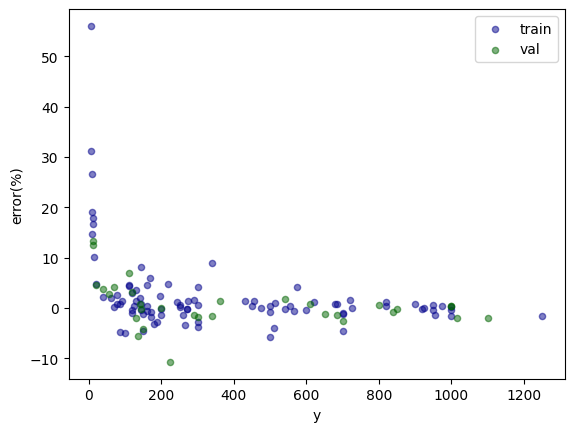

In [185]:
ax = results_train.plot(y='error_train(%)', x='y_train', kind='scatter', color='DarkBlue', label='train', alpha = 0.5)
results_val.plot(y='error_val(%)', x='y_val', kind='scatter', ax=ax, color='DarkGreen', label='val', alpha = 0.5)
plt.xlabel('y')
plt.ylabel('error(%)')

Check if only with numerical variables the performance is better. Well... all species shall have the same density more or less, aren't they?

In [186]:
preprocessor = ColumnTransformer([
  ('numerical', StandardScaler(), simplified_numerical)
], remainder='drop')
xgb_regressor = XGBRegressor(random_state=5, n_jobs=4)
train_pipeline = make_pipeline(preprocessor, xgb_regressor)
gs_xgboost = GridSearchCV(estimator=train_pipeline, param_grid=xgb_params, scoring="neg_root_mean_squared_error", verbose=True)
gs_xgboost.fit(df_full_train[numerical], y_full_train)
y_pred_train = gs_xgboost.predict(df_train)
y_pred_val = gs_xgboost.predict(df_val)
y_pred_test = gs_xgboost.predict(df_test)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


In [187]:
print(mean_squared_error(y_pred_train, y_train, squared=False))
print(mean_squared_error(y_pred_full_train, y_full_train, squared=False))
print(mean_squared_error(y_pred_val, y_val, squared=False))
print(mean_squared_error(y_pred_test, y_test, squared=False))
y_pred_full_train = gs_xgboost.predict(df_full_train)

18.18434924680026
8.44024791045071
16.439508948722754
63.6233301313371


A simpler model has improved the overfitting on the full_train set. The results are similar, so we can drop the categorical variable, at least with XGBoost  
However, for the sake of completness of this project, we will keep the categorical variable in the final model  

# Xgboost is the best model

Let's try an experiment. Cross-val with the entire dataset to get the best params of XGBoost, then train with only train, test sets

In [188]:
from sklearn.utils import shuffle
shuffled = shuffle(dataset_no_outliers, random_state=5)

In [189]:
preprocessor = ColumnTransformer([
  ('numerical', StandardScaler(), simplified_numerical)
], remainder='drop')
xgb_regressor = XGBRegressor(random_state=5, n_jobs=4)
train_pipeline = make_pipeline(preprocessor, xgb_regressor)
gs_xgboost = GridSearchCV(estimator=train_pipeline, param_grid=xgb_params, scoring="neg_root_mean_squared_error", verbose=True)
gs_xgboost.fit(dataset_no_outliers[numerical], dataset_no_outliers[target].values)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         StandardScaler(),
                                                                         ['length1',
                                                                          'height',
                                                                          'width'])])),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eva...
                                                     monotone_constraints=None,
                                                     n_estimators=100, n_jobs=4,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=5, ...))]),
             param_grid=[{'xgbregressor__eta': [1, 0.5, 0.3, 0.1, 0.01, 0.001],
                          'xgbregressor__max_depth': [2, 3, 4, 5, 6],
                          'xgbregressor__min_child_weight': [1, 5, 10],
                          'xgbregressor__n_estimators': [5, 10, 50, 80, 100,
                                                         120]}],
             scoring='neg_root_mean_squared_error', verbose=True)

In [190]:
berst_params = gs_xgboost.best_params_
print(gs_xgboost.best_params_)

{'xgbregressor__eta': 0.1, 'xgbregressor__max_depth': 3, 'xgbregressor__min_child_weight': 1, 'xgbregressor__n_estimators': 120}


In [191]:
def split(raw_dataset, target):
  dataset = raw_dataset.copy() 
  df_train, df_test = train_test_split(dataset, test_size=0.2, random_state=5)
  y_train = df_train[target].values
  y_test = df_test[target].values
  del df_train[target]
  del df_test[target]
  return df_train, df_test, y_train, y_test

In [192]:
xgb_regressor = XGBRegressor(random_state=5, n_jobs=4, eta=0.1, max_depth=3, min_child_weight=1, n_estimators=120)
train_pipeline = make_pipeline(preprocessor, xgb_regressor)
df_train, df_test, y_train, y_test = split(dataset_no_outliers, target)
train_pipeline.fit(df_train[numerical], y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['length1', 'height',
                                                   'width'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eta=0.1,
                              eval_metric=None, feature_types=None, gamma=0,
                              gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.100000001, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=3, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=120,
                              n_jobs=4, num_parallel_tree=1, predictor='auto', ...))])

In [193]:
y_pred_test= train_pipeline.predict(df_test)
print(mean_squared_error(y_pred_test, y_test, squared=False))

72.22880792546928


No improvement